# Thesis 2020-2021: Emotion detection model 

In this notebook, we will create an emotion detection model.

In [4]:
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt

In [5]:
import csv
    
df_train = pd.read_csv('data/hateval2019_en_train.csv')#, encoding='cp1252')
df_dev = pd.read_csv('data/hateval2019_en_dev.csv')#, encoding='cp1252')

df_train_dev = df_train.append(df_dev, ignore_index=True)
df_train_dev = df_train_dev.drop(['TR', 'AG'], axis=1)

df_test = pd.read_csv('data/hateval2019_en_test.csv')
df_test = df_test.drop(['TR', 'AG'], axis=1)

In [3]:
df_train_dev

,id,text,HS
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1
1,202,Why would young fighting age men be the vast m...,1
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0
4,205,Orban in Brussels: European leaders are ignori...,0
...,...,...,...
9995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0
9996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1
9997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0
9998,19199,I hate bitches who talk about niggaz with kids...,1


First of all, let us see how many of our tweets contain emojis. The more the better! If there are barely any tweets with emojis, then it does not really make sense to base our model on emotion detection.

In [11]:
from emoji import UNICODE_EMOJI
UNICODE_EMOJI

{'🥇': ':1st_place_medal:',
 '🥈': ':2nd_place_medal:',
 '🥉': ':3rd_place_medal:',
 '🆎': ':AB_button_(blood_type):',
 '🏧': ':ATM_sign:',
 '🅰': ':A_button_(blood_type):',
 '🇦 🇫': ':Afghanistan:',
 '🇦 🇱': ':Albania:',
 '🇩 🇿': ':Algeria:',
 '🇦 🇸': ':American_Samoa:',
 '🇦 🇩': ':Andorra:',
 '🇦 🇴': ':Angola:',
 '🇦 🇮': ':Anguilla:',
 '🇦 🇶': ':Antarctica:',
 '🇦 🇬': ':Antigua_&_Barbuda:',
 '♒': ':Aquarius:',
 '🇦 🇷': ':Argentina:',
 '♈': ':Aries:',
 '🇦 🇲': ':Armenia:',
 '🇦 🇼': ':Aruba:',
 '🇦 🇨': ':Ascension_Island:',
 '🇦 🇺': ':Australia:',
 '🇦 🇹': ':Austria:',
 '🇦 🇿': ':Azerbaijan:',
 '🔙': ':BACK_arrow:',
 '🅱': ':B_button_(blood_type):',
 '🇧 🇸': ':Bahamas:',
 '🇧 🇭': ':Bahrain:',
 '🇧 🇩': ':Bangladesh:',
 '🇧 🇧': ':Barbados:',
 '🇧 🇾': ':Belarus:',
 '🇧 🇪': ':Belgium:',
 '🇧 🇿': ':Belize:',
 '🇧 🇯': ':Benin:',
 '🇧 🇲': ':Bermuda:',
 '🇧 🇹': ':Bhutan:',
 '🇧 🇴': ':Bolivia:',
 '🇧 🇦': ':Bosnia_&_Herzegovina:',
 '🇧 🇼': ':Botswana:',
 '🇧 🇻': ':Bouvet_Island:',
 '🇧 🇷': ':Brazil:',
 '🇮 🇴': ':British_Indian_Ocean_T

In [21]:
set("Hello I'm Bob 💎") & set(UNICODE_EMOJI['en'])

{'💎'}

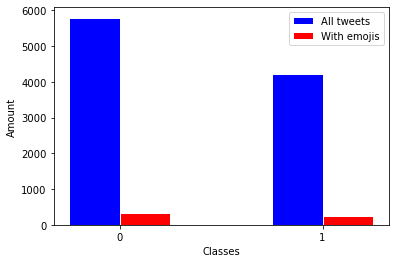

Note: 341 out of 5790 (non-hateful) tweets contain emojis.
Note: 248 out of 4210 (hateful) tweets contain emojis.


In [12]:
# Code to plot the number of tweets with emojis (consider anger dataset as your HS dataset) -> provided by Olha 
# Tip: Good idea to calculate it separately for both classes.

# PLOT FOR TRAINING DATA
 
import numpy as np
import matplotlib.pyplot as plt
from emoji import UNICODE_EMOJI
 
# Count amount of tweets with emojis for each class
counter_anger = [0,0]
counter_emojis_anger = [0,0]
tweets_with_emojis = []
for i in range(len(df_train_dev)):
    if len(list(set(df_train_dev['text'][i]) & set(UNICODE_EMOJI))) > 0:
        counter_emojis_anger[df_train_dev['HS'][i]] += 1
        tweets_with_emojis.append(df_train_dev['text'][i])
    counter_anger[df_train_dev['HS'][i]] += 1

# Set width of bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(counter_anger))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, counter_anger, color='blue', width=barWidth, edgecolor='white', label='All tweets')
plt.bar(r2, counter_emojis_anger, color='red', width=barWidth, edgecolor='white', label='With emojis')

# Add xticks on the middle of the group bars
plt.xlabel('Classes')
plt.ylabel('Amount')
plt.xticks([r + barWidth/2 for r in range(len(counter_anger))], ['0', '1'])

# Create legend & Show graphic
#plt.title('Proportion emojis for ', fontweight='bold')
plt.legend()
plt.show()
print("Note:", counter_emojis_anger[0], "out of", counter_anger[0], "(non-hateful) tweets contain emojis.")
print("Note:", counter_emojis_anger[1], "out of", counter_anger[1], "(hateful) tweets contain emojis.")

In [34]:
tweets_with_emojis

['While @realDonaldTrump attacks our state’s immigrants, @BruceRauner has dragged his feet on signing critical legislation to protect our immigrant community, including:  ☑️ SB 34 ☑️ SB 35 ☑️ SB 3103 ☑️ SB 3109 ☑️ SB 3488  #ilgov #twill https://t.co/AyWuAZwNEf',
 'What a wonderful woman! This is the kind of immigrant we need here! 💕🇺🇸🇺🇸🇺🇸💪🏻 https://t.co/L6i1hjN30j',
 'I got offered once by a neighbor to go to a church down the street &amp; thought about it but then found out a week later the priest was sexually assaulting immigrant women &amp; threatening to call ICE on them if they told. That was my sign to stay w my little shrine in my room 👋🏼',
 'Immigrant youth are #HereToStay! ✊🏾   https://t.co/KyeBdGixba',
 'https://t.co/L7Zmdmin9BGermanyðŸ•³life at EU CoreðŸ‘‰54,000 “relatives” of migrants came to ðŸ‡©ðŸ‡ª last year for “reunification”. Little Sisters @CSU wanted new limits at 1,000/month bt embassies already report 34,000 new requests. No end to delusions of Merkel, CSU.#Visegr

In [57]:
# WARNING: There are some undetected emoji's within the given tweets encoded in the cp1252 format
# (some of them are decoded but some are for some unknown reason)

print("ðŸ˜Š".encode('cp1252').decode('utf8'))
print("ðŸ˜®Ed.".encode('cp1252').decode('utf8'))
print("ðŸ•³".encode('cp1252').decode('utf8'))
print("ðŸ‘‰".encode('cp1252').decode('utf8'))
print("ðŸ‡©ðŸ‡ª".encode('cp1252').decode('utf8'))
print("ðŸ’•ðŸ‡ºðŸ‡¸".encode('cp1252').decode('utf8'))

😊
😮Ed.
🕳
👉
🇩🇪
💕🇺🇸


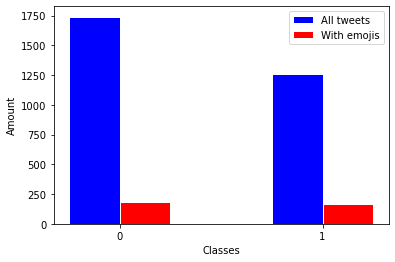

Note: 180 out of 1740 (non-hateful) tweets contain emojis.
Note: 163 out of 1260 (hateful) tweets contain emojis.


In [13]:
# PLOT FOR TEST DATA

# Count amount of tweets with emojis for each class
counter_anger = [0,0]
counter_emojis_anger = [0,0]
for i in range(len(df_test)):
    if len(list(set(df_test['text'][i]) & set(UNICODE_EMOJI))) > 0:
        counter_emojis_anger[df_test['HS'][i]] += 1
    counter_anger[df_test['HS'][i]] += 1

# Set width of bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(counter_anger))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, counter_anger, color='blue', width=barWidth, edgecolor='white', label='All tweets')
plt.bar(r2, counter_emojis_anger, color='red', width=barWidth, edgecolor='white', label='With emojis')

# Add xticks on the middle of the group bars
plt.xlabel('Classes')
plt.ylabel('Amount')
plt.xticks([r + barWidth/2 for r in range(len(counter_anger))], ['0', '1'])

# Create legend & Show graphic
#plt.title('Anger', fontweight='bold')
plt.legend()
plt.show()
print("Note:", counter_emojis_anger[0], "out of", counter_anger[0], "(non-hateful) tweets contain emojis.")
print("Note:", counter_emojis_anger[1], "out of", counter_anger[1], "(hateful) tweets contain emojis.")

## Now we will use a list of the most predictive emojis for hate speech detection

In [135]:
# Based on paper: "Exploiting Emojis for Abusive Language Detection" by M. Wiegand, J. Ruppenhofer.
# List of most predictive emojis for hate speech detection

# Inspiration for the following list comes from above paper
hateful_emojis = ['🖕', '😠', '🤢', '🤮', '😡', '🤬', '💩', '🔫', '🙉', '☠️', '👊']

In [136]:
from textblob import TextBlob

# get HS label based on polarity & hateful emoji list
def get_HS_polarity_emoji(text):
    polarity = TextBlob(text).sentiment.polarity
    if len(list(set(text) & set(hateful_emojis))) > 0:
        return 1
    if polarity < 0:
        return 1
    else:
        return 0

In [137]:
df_test_polarity = df_test.copy()
# Create new 'HS' column
df_test_polarity['HS'] = df_test_polarity['text'].apply(get_HS_polarity_emoji)
df_test_polarity

,id,text,HS
0,34243,"@local1025 @njdotcom @GovMurphy Oh, I could ha...",0
1,30593,Several of the wild fires in #california and #...,0
2,31427,@JudicialWatch My question is how do you reset...,1
3,31694,"#Europe, you've got a problem! We must hurry...",0
4,31865,This is outrageous! #StopIllegalImmigration #...,1
...,...,...,...
2995,31368,you can never take a L off a real bitch😩 im ho...,0
2996,30104,@Brian_202 likes to call me a cunt & a bitch b...,0
2997,31912,@kusha1a @Camio_the_wise @shoe0nhead 1. Never ...,0
2998,31000,If i see and know you a hoe why would i hit yo...,0


In [138]:
import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook

# Create prediction file for the polarity_and_emoji
df_test_polarity[['id', 'HS']].to_csv('predictions/polarity_and_emoji.tsv', sep='\t', index=False, header=False)
df_test_polarity[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the polarity_and_emoji
evaluate.write_eval("scores_polarity_emoji")

taskA_fscore: 0.5801758620107678
taskA_precision: 0.585841049382716
taskA_recall: 0.5803776683087027
taskA_accuracy: 0.602


## AMAZING! Improvement from 0.5782 to 0.5802 thanks to predictive emoji list. Best score up until now! 🥳

In [134]:
from sklearn.metrics import f1_score

hateful_emojis_loop = ['🖕', '😠', '🤢', '🤮', '😡', '🤬', '💩', '🔫', '🙉', '☠️', '👊']
dict_emoji_f1 = {}
df_test_polarity = df_test.copy()

for e in hateful_emojis_loop:
    dict_emoji_f1[e] = 0
    hateful_emojis = [e]
    # Create new 'HS' column
    df_test_polarity['HS_predicted'] = df_test_polarity['text'].apply(get_HS_polarity_emoji)
    f1 = f1_score(df_test_polarity['HS'].values, df_test_polarity['HS_predicted'].values, average='macro')
    dict_emoji_f1[e] = f1

print(dict_emoji_f1)
    
for e in dict_emoji_f1:
    dict_emoji_f1[e] = dict_emoji_f1[e] - 0.5782252507177447 # with the latter being the f1-score of the polarity baseline
    
dict_emoji_f1

{'🖕': 0.5787821137583884, '😠': 0.5782252507177447, '🤢': 0.5782252507177447, '🤮': 0.5782252507177447, '😡': 0.5796216031578685, '🤬': 0.5782252507177447, '💩': 0.5782252507177447, '🔫': 0.5782252507177447, '🙉': 0.5782252507177447, '☠️': 0.5782252507177447, '👊': 0.5782252507177447}


{'🖕': 0.0005568630406437292,
 '😠': 0.0,
 '🤢': 0.0,
 '🤮': 0.0,
 '😡': 0.0013963524401238159,
 '🤬': 0.0,
 '💩': 0.0,
 '🔫': 0.0,
 '🙉': 0.0,
 '☠️': 0.0,
 '👊': 0.0}

### Top 2 most predictive hate emojis for test data:
- 😡
- 🖕


# DEEPMOJI (to be continued ...)